In [8]:
%matplotlib inline
import matplotlib as matplotlib
from mpl_toolkits.mplot3d import Axes3D
import numpy as numpy

def antoine(T):

    P=10**(8.07131-(1730.63/(233.426+T-273.15)))

    return P

def antoine2(T):

    P=10*10**(7.68117-(1332.04/(199.2+T-273.15)))

    return P

def normalize(min, max, var):
    new_var = (var-min)/(max-min)
    return new_var

In [9]:
T = numpy.linspace(250,325,300)
T2 = numpy.linspace(250,350,300)
X = numpy.zeros(300)
Y = numpy.ones(300)
Pbub = numpy.zeros(300)
Pdew = numpy.zeros(300)
W = numpy.linspace(antoine(290), 200, 300)
W2 = numpy.linspace(0, 220, 300)
Z = numpy.linspace(0,0.58,300)
A = numpy.linspace(0,1.0,300)

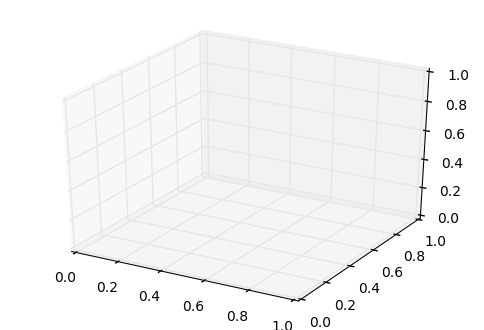

In [10]:
fig = matplotlib.pyplot.figure(1)
ax  = fig.add_subplot(111,projection = '3d')

In [11]:
ax.set_xlabel('x')
ax.set_ylabel('T')
ax.set_zlabel('P')

In [12]:
ax.set_xlim(left=0, right=1, emit=True, auto=False) #fração molar
ax.set_ylim3d(bottom=0, top=1, emit=True, auto=False) #temperatura 250-340
ax.set_xticklabels([1,"","","","",0], fontdict=None, minor=False) #ticks fração molar
ax.set_yticklabels("", fontdict=None, minor=False) #ticks temperatura
ax.set_zlim3d(bottom=0, top=1, emit=True, auto=False) #pressão 10-300
ax.set_zticklabels("", fontdict=None, minor=False) #ticks pressão

[]

In [13]:
Pbub = (A*antoine2(Y*290)+(1-A)*antoine(Y*290))
Pdew = (1/((A/antoine2(Y*290))+((1-A)/antoine(Y*290))))

In [14]:
ax.plot(X, normalize(250,340,T), normalize(10,300,antoine(T)), 'k-.',linewidth=2) #antoine do componente menos volátil
ax.quiver(0,normalize(250,340,290),normalize(10,300,antoine(290)),0,0,1, length=0.65,arrow_length_ratio = 0.15, pivot='tail', color='k', hatch='*') #correção de Poynting
ax.quiver(0,normalize(250,340,290),normalize(10,300,200),1,0,0, length=0.58,arrow_length_ratio = 0.15, pivot='tail', color='k') #Gexc + mistura
ax.plot(A, normalize(250,340,Y*290), normalize(10,300,Pbub), 'k--') #curva de ponto de bolha
ax.plot(A, normalize(250,340,Y*290), normalize(10,300,Pdew), 'k--') #curva de ponto de orvalho

ax.scatter(0, normalize(250,340,290), normalize(10,300,antoine(290)), edgecolors='k')
ax.scatter(0,(290-250)/(340-250),(200-10)/(300-10), edgecolors='k')
ax.scatter(0.585,(290-250)/(340-250),(200-10)/(300-10), edgecolors='k')
ax.scatter(0.975,(290-250)/(340-250),(200-10)/(300-10), edgecolors='k')

fig.savefig('fig.png')